In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import pingouin as pg
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from matplotlib.lines import Line2D
import matplotlib.lines as mlines
import math
import seaborn as sns

## import raw data

In [2]:
df = pd.read_csv("/Users/jialexu/Desktop/Project2GWAS-BehvaioralGenetics/bin/permutation_result.txt", 
                 sep='\t', index_col=0).transpose()
df

,Triat1,Triat2,Triat3
0,5.669249,5.448390,4.813708
1,6.135621,5.138966,5.152874
2,6.436614,6.656444,5.411082
3,5.981445,6.105550,5.694451
4,6.095233,6.353704,6.081812
...,...,...,...
395,5.074300,6.428716,6.100282
396,6.635624,6.123723,5.785397
397,5.681517,5.058413,5.680220
398,5.093717,5.265127,6.004845


/Users/jialexu/opt/anaconda3/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


## exclude extremely high and low values using 3 std

In [3]:
limit1 = df.stack().mean()+3*df.stack().std()
limit2 = df.stack().mean()-3*df.stack().std()
df_perm_value = df.stack()[(df.stack()>limit2)&(df.stack()<limit1)]
df_perm_value.quantile(0.95)

6.813132013613057

In [4]:
df_perm_value

0    Triat1    5.669249
     Triat2    5.448390
     Triat3    4.813708
1    Triat1    6.135621
     Triat2    5.138966
                 ...   
398  Triat2    5.265127
     Triat3    6.004845
399  Triat1    5.526245
     Triat2    6.122371
     Triat3    5.101744
Length: 1183, dtype: float64

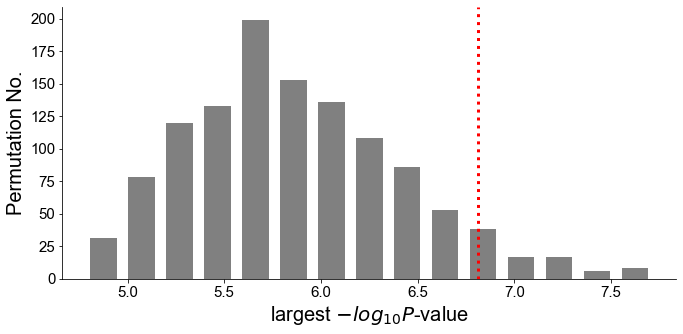

In [265]:
f, ax = plt.subplots(figsize=(11,5))
ax.hist(df_perm_value, rwidth=0.7, bins = 15, color='grey')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.axvline(x=df_perm_value.quantile(0.95), color = 'r', ls=':', lw=3)
ax.set_ylabel("Permutation No.", fontname="Arial", fontsize=20)
ax.set_xlabel("largest $-log_{10}P$-value", fontname="Arial", fontsize=20)
for tick in ax.get_xticklabels():
    tick.set_fontname("Arial")
    tick.set_fontsize(15)
for tick in ax.get_yticklabels():
    tick.set_fontname("Arial")
    tick.set_fontsize(15)
plt.show()